## Best Selling Books Machine Learning Using Kmeans

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Data

In [2]:
df = pd.read_csv('../dataset/bestsellers with categories.csv')

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [6]:
from numpy import array
from sklearn.preprocessing import LabelEncoder
data = df['Genre']
values = array(data)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

[1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1
 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0
 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1
 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 0 1 

In [7]:
df['Genre'] = integer_encoded

In [8]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,1
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,1


In [9]:
fig = go.Figure(data=go.Scatter(x=df['Price'],
                                y=df['User Rating'],
                                mode='markers',
                                text=df['Name'],
                                marker=dict(color='#17408b')
                                ))

fig.update_layout(
    title='Books Price versus User Rating (for interactive exploration)',
    xaxis_title='Price ($)',
    yaxis_title='User Rating (1-5)',
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.show()

In [10]:
df2 = df.drop(['Name', 'Author'], axis = 1) 

In [11]:
X = df2.values
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [12]:
X

array([[ 0.35999008,  0.46045266, -0.47080975,  0.63245553,  0.87988269],
       [-0.08097772, -0.84478593,  0.82160918, -0.9486833 , -1.13651514],
       [ 0.35999008,  0.59944035,  0.17539971,  1.26491106,  0.87988269],
       ...,
       [ 0.35999008,  0.20286897, -0.47080975,  0.9486833 ,  0.87988269],
       [ 0.35999008,  0.20286897, -0.47080975,  1.26491106,  0.87988269],
       [ 0.35999008,  0.20286897, -0.47080975,  1.58113883,  0.87988269]])

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(X)

In [14]:
principalComponents1

array([[ 0.49593334, -0.82904698],
       [-0.77612784,  0.82967446],
       [ 0.58551966, -1.07836526],
       ...,
       [ 0.51872492, -1.07846368],
       [ 0.67014211, -1.22993977],
       [ 0.8215593 , -1.38141587]])

In [15]:
PCA_dataset1 = pd.DataFrame(data = principalComponents1, columns = ['component1', 'component2'] )
PCA_dataset1.head()

,component1,component2
0,0.495933,-0.829047
1,-0.776128,0.829674
2,0.585520,-1.078365
3,1.771186,0.306920
4,0.543434,-1.837775


In [16]:
principal_component1 = PCA_dataset1['component1']
principal_component2 = PCA_dataset1['component2']

<Figure size 432x288 with 0 Axes>

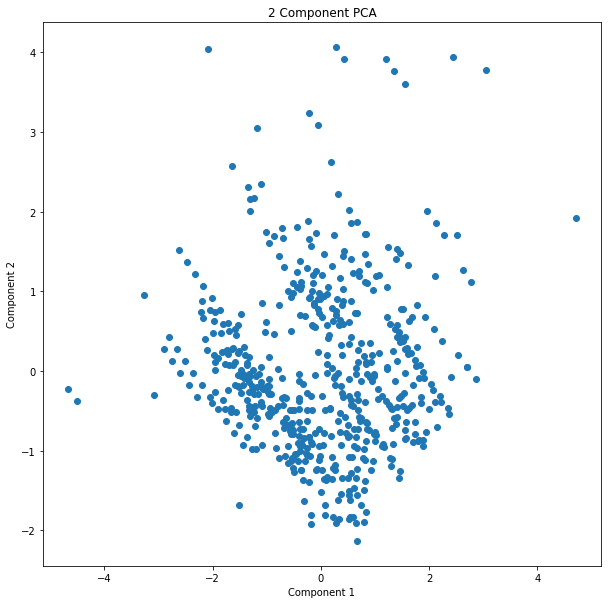

In [17]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(PCA_dataset1['component1'], PCA_dataset1['component2']) #c = y_kmeans, s=10)

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 50, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(principalComponents1)

In [19]:
from matplotlib import colors as mcolors

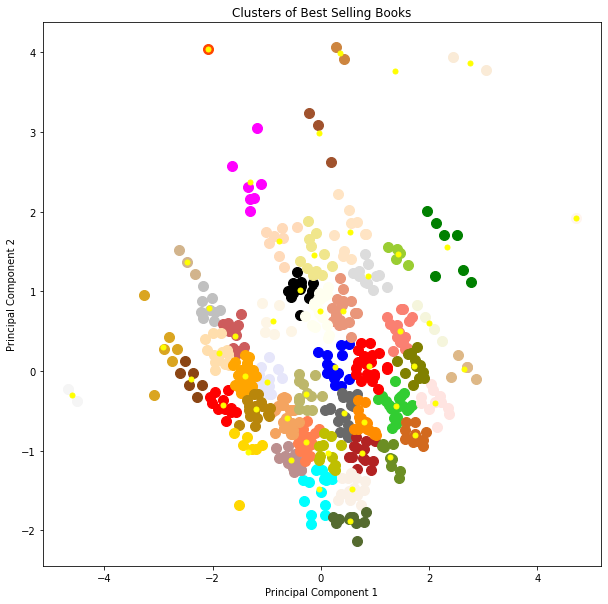

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(principalComponents1[y_kmeans == 0, 0], principalComponents1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(principalComponents1[y_kmeans == 1, 0], principalComponents1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(principalComponents1[y_kmeans == 2, 0], principalComponents1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(principalComponents1[y_kmeans == 3, 0], principalComponents1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(principalComponents1[y_kmeans == 4, 0], principalComponents1[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(principalComponents1[y_kmeans == 5, 0], principalComponents1[y_kmeans == 5, 1], s = 100, c = 'limegreen', label = 'Cluster 6')
plt.scatter(principalComponents1[y_kmeans == 6, 0], principalComponents1[y_kmeans == 6, 1], s = 100, c = 'lavender', label = 'Cluster 7')
plt.scatter(principalComponents1[y_kmeans == 7, 0], principalComponents1[y_kmeans == 7, 1], s = 100, c = 'black', label = 'Cluster 8')
plt.scatter(principalComponents1[y_kmeans == 8, 0], principalComponents1[y_kmeans == 8, 1], s = 100, c = 'dimgray', label = 'Cluster 9')
plt.scatter(principalComponents1[y_kmeans == 9, 0], principalComponents1[y_kmeans == 9, 1], s = 100, c = 'silver', label = 'Cluster 10')
plt.scatter(principalComponents1[y_kmeans == 10, 0], principalComponents1[y_kmeans == 10, 1], s = 100, c = 'gainsboro', label = 'Cluster 11')
plt.scatter(principalComponents1[y_kmeans == 11, 0], principalComponents1[y_kmeans == 11, 1], s = 100, c = 'white', label = 'Cluster 12')
plt.scatter(principalComponents1[y_kmeans == 12, 0], principalComponents1[y_kmeans == 12, 1], s = 100, c = 'whitesmoke', label = 'Cluster 13')
plt.scatter(principalComponents1[y_kmeans == 13, 0], principalComponents1[y_kmeans == 13, 1], s = 100, c = 'rosybrown', label = 'Cluster 14')
plt.scatter(principalComponents1[y_kmeans == 14, 0], principalComponents1[y_kmeans == 14, 1], s = 100, c = 'indianred', label = 'Cluster 15')
plt.scatter(principalComponents1[y_kmeans == 15, 0], principalComponents1[y_kmeans == 15, 1], s = 100, c = 'firebrick', label = 'Cluster 16')
plt.scatter(principalComponents1[y_kmeans == 16, 0], principalComponents1[y_kmeans == 16, 1], s = 100, c = 'red', label = 'Cluster 17')
plt.scatter(principalComponents1[y_kmeans == 17, 0], principalComponents1[y_kmeans == 17, 1], s = 100, c = 'mistyrose', label = 'Cluster 18')
plt.scatter(principalComponents1[y_kmeans == 18, 0], principalComponents1[y_kmeans == 18, 1], s = 100, c = 'salmon', label = 'Cluster 19')
plt.scatter(principalComponents1[y_kmeans == 19, 0], principalComponents1[y_kmeans == 19, 1], s = 100, c = 'darksalmon', label = 'Cluster 20')
plt.scatter(principalComponents1[y_kmeans == 20, 0], principalComponents1[y_kmeans == 20, 1], s = 100, c = 'coral', label = 'Cluster 21')
plt.scatter(principalComponents1[y_kmeans == 21, 0], principalComponents1[y_kmeans == 21, 1], s = 100, c = 'orangered', label = 'Cluster 22')
plt.scatter(principalComponents1[y_kmeans == 22, 0], principalComponents1[y_kmeans == 22, 1], s = 100, c = 'sienna', label = 'Cluster 23')
plt.scatter(principalComponents1[y_kmeans == 23, 0], principalComponents1[y_kmeans == 23, 1], s = 100, c = 'seashell', label = 'Cluster 24')
plt.scatter(principalComponents1[y_kmeans == 24, 0], principalComponents1[y_kmeans == 24, 1], s = 100, c = 'chocolate', label = 'Cluster 25')
plt.scatter(principalComponents1[y_kmeans == 25, 0], principalComponents1[y_kmeans == 25, 1], s = 100, c = 'saddlebrown', label = 'Cluster 26')
plt.scatter(principalComponents1[y_kmeans == 26, 0], principalComponents1[y_kmeans == 26, 1], s = 100, c = 'sandybrown', label = 'Cluster 27')
plt.scatter(principalComponents1[y_kmeans == 27, 0], principalComponents1[y_kmeans == 27, 1], s = 100, c = 'peachpuff', label = 'Cluster 28')
plt.scatter(principalComponents1[y_kmeans == 28, 0], principalComponents1[y_kmeans == 28, 1], s = 100, c = 'peru', label = 'Cluster 29')
plt.scatter(principalComponents1[y_kmeans == 29, 0], principalComponents1[y_kmeans == 29, 1], s = 100, c = 'bisque', label = 'Cluster 30')
plt.scatter(principalComponents1[y_kmeans == 30, 0], principalComponents1[y_kmeans == 30, 1], s = 100, c = 'linen', label = 'Cluster 31')
plt.scatter(principalComponents1[y_kmeans == 31, 0], principalComponents1[y_kmeans == 31, 1], s = 100, c = 'darkorange', label = 'Cluster 32')
plt.scatter(principalComponents1[y_kmeans == 32, 0], principalComponents1[y_kmeans == 32, 1], s = 100, c = 'burlywood', label = 'Cluster 33')
plt.scatter(principalComponents1[y_kmeans == 33, 0], principalComponents1[y_kmeans == 33, 1], s = 100, c = 'antiquewhite', label = 'Cluster 34')
plt.scatter(principalComponents1[y_kmeans == 34, 0], principalComponents1[y_kmeans == 34, 1], s = 100, c = 'tan', label = 'Cluster 35')
plt.scatter(principalComponents1[y_kmeans == 35, 0], principalComponents1[y_kmeans == 35, 1], s = 100, c = 'navajowhite', label = 'Cluster 36')
plt.scatter(principalComponents1[y_kmeans == 36, 0], principalComponents1[y_kmeans == 36, 1], s = 100, c = 'orange', label = 'Cluster 37')
plt.scatter(principalComponents1[y_kmeans == 37, 0], principalComponents1[y_kmeans == 37, 1], s = 100, c = 'oldlace', label = 'Cluster 38')
plt.scatter(principalComponents1[y_kmeans == 38, 0], principalComponents1[y_kmeans == 38, 1], s = 100, c = 'darkgoldenrod', label = 'Cluster 39')
plt.scatter(principalComponents1[y_kmeans == 39, 0], principalComponents1[y_kmeans == 39, 1], s = 100, c = 'goldenrod', label = 'Cluster 40')
plt.scatter(principalComponents1[y_kmeans == 40, 0], principalComponents1[y_kmeans == 40, 1], s = 100, c = 'gold', label = 'Cluster 41')
plt.scatter(principalComponents1[y_kmeans == 41, 0], principalComponents1[y_kmeans == 41, 1], s = 100, c = 'khaki', label = 'Cluster 42')
plt.scatter(principalComponents1[y_kmeans == 42, 0], principalComponents1[y_kmeans == 42, 1], s = 100, c = 'darkkhaki', label = 'Cluster 43')
plt.scatter(principalComponents1[y_kmeans == 43, 0], principalComponents1[y_kmeans == 43, 1], s = 100, c = 'ivory', label = 'Cluster 44')
plt.scatter(principalComponents1[y_kmeans == 44, 0], principalComponents1[y_kmeans == 44, 1], s = 100, c = 'beige', label = 'Cluster 45')
plt.scatter(principalComponents1[y_kmeans == 45, 0], principalComponents1[y_kmeans == 45, 1], s = 100, c = 'olive', label = 'Cluster 46')
plt.scatter(principalComponents1[y_kmeans == 46, 0], principalComponents1[y_kmeans == 46, 1], s = 100, c = 'y', label = 'Cluster 47')
plt.scatter(principalComponents1[y_kmeans == 47, 0], principalComponents1[y_kmeans == 47, 1], s = 100, c = 'olivedrab', label = 'Cluster 48')
plt.scatter(principalComponents1[y_kmeans == 48, 0], principalComponents1[y_kmeans == 48, 1], s = 100, c = 'yellowgreen', label = 'Cluster 49')
plt.scatter(principalComponents1[y_kmeans == 49, 0], principalComponents1[y_kmeans == 49, 1], s = 100, c = 'darkolivegreen', label = 'Cluster 50')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 25, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Best Selling Books')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [21]:
df['principal component 1'] = PCA_dataset1['component1']
df['principal component 2'] = PCA_dataset1['component2']

In [22]:
import plotly.express as px


fig = px.scatter(df, x="principal component 1", y="principal component 2", log_x=True, color = y_kmeans,
                 hover_name="Name", hover_data=["Author"])

fig.show()